<a href="https://colab.research.google.com/github/angeloBuso/algoritmos_ML/blob/main/%5BTemplate_Classificador_Buso%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="header title" width="100%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/Imagem2.jpg?raw=true">

<img alt = "qr-code" align = "right" width="10%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/angelobuso.png?raw=true">


## **1. Compreens√£o Problema de Neg√≥cio**

---

A tecnologia √© um indutor global na economia, isso √© fato. O *E-Commerce* √© um exemplo desse movimento indutor. No entanto enquanto uma grande parte das pessoas est√£o focadas em desenvolver solu√ß√µes tecnol√≥gicas que facilitam a vida dos usu√°rios, h√° uma outra parcela que agem no ituito de obterem vantagens il√≠citas. Podemos citar as imita√ß√µes de sites, aplicativos e perfis de empresas em redes sociais est√£o cada vez mais fidedignas e com essas t√°ticas, esses criminosos roubam os seus dados

["Ter o cart√£o clonado √© algo que assusta 83% dos brasileiros; na compara√ß√£o, a pandemia √© uma grande amea√ßa para 61% dos entrevistados"](https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html)

A preocupa√ß√£o dos brasileiros leva em conta o medo de ficarem no preju√≠zo financeiro, ou pelo menos, o preju√≠zo at√© o t√©rmino na an√°lise do poss√≠vel fraude, pela operadora do cart√£o fraudado. 

Sendo assim, as insitui√ß√µes operadoras de cart√£o tem o dever de monitorar, em tempo real, as transa√ß√µes financeiras, transacionadas pelos cart√µes de seus clientes. O desafio destas institui√ß√µes √© terem ferramentas que possam prever a probabilidade da transa√ß√£o ser fraude e agir com tempestividade, preservando os dados e o cliente.

Apenas no Brasil, cerca de 12,1 milh√µes de pessoas j√° foram v√≠timas de algum tipo de fraude financeira no √∫ltimo ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilh√£o de preju√≠zo por ano para os √∫ltimos 12 meses.

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/hacker-colorido-e-plano-foge-homem-de-composicao-roubar-cartao-de-credito-e-executa-ilustracao-vetorial_1284-30699.jpg" width="100%"></p>

Neste projeto, iremos abordar esse problema **das fraudes em cart√µes de cr√©dito**, uma das principais preocupa√ß√µes das institui√ß√µes financeiras como bancos e *fintechs*. Fraudes envolvendo cart√µes de cr√©dito sua n√£o-detec√ß√£o acaretar√° preju√≠zos consider√°veis, tanto para o consumidor quanto para a institui√ß√£o financeira.

Um outro fator a ser considerado √© a quantidade de falsos positivos, ou seja, aquelas vezes em que voc√™ tentou comprar uma cadeira gamer com super desconto rel√¢mpago na Amazon e teve seu cart√£o bloqueado preventivamente, que provavelmente gerou estresse, ou ainda, aquela passagem a√©rea da Itapemerim com aquele *precinho*....pensando bem esse √∫ltimo ai foi at√© bom ter dado falso positivo... (rsrsrsrs)

Esse contexto de desafio apresentado podemos usar Intelig√™ncia Artificial para tal detec√ß√£o. Usando (a) uma base hist√≥rica, (b) um algoritmo de machine learning e (c) as compreens√£o das t√©cnicas e boas pr√°tidas da Ci√™ncia de Dados, construiremos uma ferramentaque poder√° permitir uma economia de milh√µes de Reais.

### 1.1 Dicion√°rio dados

In [1]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import scikitplot as skplt

%matplotlib inline

# Vers√£o da Linguagem Python
from platform import python_version
print('Vers√£o da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Vers√£o da Linguagem Python Usada Neste Jupyter Notebook: 3.7.12


## **2. Coleta Dados**
Como todo projeto de *machine learning* a mat√©ria-prima s√£o  **dados**, utilizaremos uma cole√ß√£o de informa√ß√µes catalogadas em um per√≠odo de **2 dias**, por usu√°rios de cart√µes na Europa. Ao longo desse per√≠odo foram registradas quase **290 mil transa√ß√µes** envolvendo cart√µes, sendo que **492 foram fraudes**.

<p align=center>
<img src="https://img.freepik.com/free-vector/concept-credit-card-payment-landing-page_52683-24923.jpg?size=338&ext=jpg" width="75%"></p>

Nota-se que o conjunto de dados √© extremamente **desbalanceado**, sendo que as fraudes representam apenas 0,17% do total transacionado.

Uma particularidade interessante √© que as vari√°veis (*features*) s√£o todas num√©ricas, descaracterizadas das informa√ß√µes originais. Nada mais justo para resguardar esse ativo precioso dessas empresas, **os dados**, al√©m de n√£o expor a confidencialidade dos clientes (por problemas ligados √† privacidade e seguran√ßa). Sendo assim, as *features* s√£o representadas por $[V1, V2, V3 \dots, V28]$.

[Na fonte dos dados, ](https://www.kaggle.com/mlg-ulb/creditcardfraud) nos √© informado que as *features*, para ter essa anonimiza√ß√£o, foram transformadas por uma t√©cnica conhecida como An√°lise de Componentes Principais [(*Principal Component Analysis* - PCA)](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

Em suma, PCA permite **reduzir dimens√£o** dos dados, enquanto mant√©m o maior n√∫mero poss√≠vel de **informa√ß√µes**. √â um algor√≠tmo de otimiza√ß√£o que encontra um conjunto novo de recursos - os chamados **componentes**. Podemo deduzir que os componentes achados pela transforma√ß√£o da *PCA*, no dataSet original s√£o as pr√≥prias *features* $[V1, V2, V3 \dots, V28]$.

### 2.1 Carga dados
DICA: at√© 3 dimens√µes PANDAS (1Series, 2DataFrame e 3Panel); acima 3 dim NUMPY (nparray)

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
dados = pd.read_csv(file_path)

In [4]:
dados.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

## 3. **An√°lise Explorat√≥ria**


### 3.1 Vis√£o Geral dataSet
Estat√≠stica Descritiva:
 * Tipo Objeto
 * Tipo Dados
 * Shape - Dimensionalidade
 * Indices
 * Describe dados


In [5]:
def visaogeral(df, messagem):
    print(f'{messagem}:\n')
    print("Qtd Observa√ß√µes:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(dados.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [6]:
visaogeral(dados,'Vis√£o Geral dataSet treino')

Vis√£o Geral dataSet treino:

Qtd Observa√ß√µes: 284807

Qtd Atributos: 31

Atributos:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Qtd Valores missing: 0

Valores Unicos:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Qual tipo de dados √© nosso dataSet?



In [8]:
print('Nossos dados s√£o do tipo:', type(dados))

Nossos dados s√£o do tipo: <class 'pandas.core.frame.DataFrame'>


DICA: Se o n√∫mero de linhas/observa√ß√µes no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o n√∫mero de registros for muito pequeno, voc√™ pode n√£o ter registros suficientes para treinar seu modelo (underfitting- decora ponto dos dados).

Se voc√™ tiver muitas colunas/atributos em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solu√ß√£o vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior (70% treino) e depois aplique o modelo a novos dados (30% teste) para verificar a performance. Uma boa pr√°tica √© ter uma massa de dados para valida√ß√£o durante o treinamento.

In [9]:
# Observando os dados finais do dataSet
dados.tail()

Time         V1         V2  ...       V28  Amount  Class
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[5 rows x 31 columns]

In [10]:
print('Os dados possuem {:f} observa√ß√µes/linhas e {} atributos/colunas.'.format(dados.shape[0], dados.shape[1]))             

Os dados possuem 284807.000000 observa√ß√µes/linhas e 31 atributos/colunas.


DICA: verificar tipo dos dados √© muito importante. Pode ser necess√°rio converter strings, ou colunas com n√∫meros inteiros podem representar vari√°veis categ√≥ricas ou valores ordin√°rios. (**informa√ß√£o representa o que est√° informando**)

In [11]:
tipo = pd.DataFrame(dados.dtypes, columns= ['Tipos de dado'])
tipo.columns.name = 'Vari√°veis'
tipo

Vari√°veis Tipos de dado
Time            float64
V1              float64
V2              float64
V3              float64
V4              float64
V5              float64
V6              float64
V7              float64
V8              float64
V9              float64
V10             float64
V11             float64
V12             float64
V13             float64
V14             float64
V15             float64
V16             float64
V17             float64
V18             float64
V19             float64
V20             float64
V21             float64
V22             float64
V23             float64
V24             float64
V25             float64
V26             float64
V27             float64
V28             float64
Amount          float64
Class             int64

Verificamos que as informa√ß√µes est√£o sendo representadas por dados do tipo `float64`, ou seja, dados num√©ricos decimais. A √∫ltima vari√°vel, a de interesse, est√° sendo representada por tipo `int64` dados n√∫m√©ricos inteiros.    

In [12]:
# checando √≠ndice e sua distribui√ß√£o
dados.index

RangeIndex(start=0, stop=284807, step=1)

In [13]:
# checando os nomes das colunas
dados.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Resumo das principais estat√≠sticas dos dados.

In [14]:
dados.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [15]:
dados.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

A vari√°vel `Amount`, que indicado o montante envolvido nas transa√ß√µes, observamos que o valor m√©dio das transa√ß√µes, tanto fraudulentas, quanto genu√≠nas √© de 88,34, sendo o valor de 22,00 que divide a amostra ao meio (mediana) e com um desvio padr√£o de 250,12. Notamos um valor m√°ximo de 25.691,16, candidato a um poss√≠vel *outlier*. Com isso inferimos que a maioria dos montantes envolvidos √© composta por quantias menores.

####  3.1.1  Verificando Missing 

In [16]:
dados.isnull().sum()/dados.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Verificamos que os dados n√£o possuem dados ausentes. Demonstra a qualidade dos dados. Cabe ressaltar que na fonte dos dados j√° nos indicou que os mesmos j√° haviam passados por uma fase prepara√ß√£o, dado as quest√µes de sigilos. No entanto, √© muito comum nos trabalhos de data science lidar com dados ausentes.


#### 3.1.2 Var_Explanat√≥ria e Var_Target

In [17]:
X = dados.drop(columns= 'Class', axis= 1)
y = pd.DataFrame(dados.Class)

In [18]:
print('DataSet original com {} atributos e {} observa√ß√µes'.format(dados.shape[1], dados.shape[0]))
print('As vari√°veis independentes com {} atributos e {} observa√ß√µes'.format(X.shape[1], X.shape[0]))
print('A vari√°vel dependente - iremos prever com {} atributo e {} observa√ß√µes'.format(y.shape[1], y.shape[0]))

DataSet original com 31 atributos e 284807 observa√ß√µes
As vari√°veis independentes com 30 atributos e 284807 observa√ß√µes
A vari√°vel dependente - iremos prever com 1 atributo e 284807 observa√ß√µes


####  3.1.3  An√°lise da Var_Target

A vari√°vel de interesse √© o atributo `Class` do nosso data Set. √â a vari√°vel que indica se a transa√ß√£o do cart√£o de cr√©dito foi **genu√≠na** ou se tratava de uma **fraude**. Separamos ela para o objeto `y` (item 3.1.2).
As demais vari√°veis que chamamos de vari√°veis independentes e as trataremos mais abaixo. Focaremos agora na **vari√°vel predita**.

#####  3.1.3.1  Amplitude

In [19]:
y.describe()

Class
count  284807.000000
mean        0.001727
std         0.041527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

In [20]:
y.nunique()

Class    2
dtype: int64

Observando os valores `max` 1 e o valor `min` 0, bem como o resultado da fun√ß√£o `nunique` indica que vari√°vel target √© do tipo categ√≥rica e possui 2 categorias: 0 = transa√ß√£o genu√≠na, 1 = transa√ß√£o fraudulenta. Estamos diante de um problema de aprendizado supervisionado do tipo **classifica√ß√£o**.

#####  3.1.3.2  Balanceamento dados
Em problemas de classifica√ß√£o pode ser necess√°rio balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) s√£o comuns e precisam ser tratadas durante a fase de pr√©-processamento. Podemos ver abaixo que existe uma clara despropor√ß√£o entre as classes 0 (genu√≠na) e 1 (fraude).

In [21]:
y.value_counts()

Class
0        284315
1           492
dtype: int64

In [22]:
print("\nTransa√ß√µes fraudulentas representam {:.4f}% do dataSet".format((dados[dados.Class==1].shape[0]/dados.shape[0])*100))
print("Enquanto transa√ß√µes genu√≠nas s√£o {:.4f}% dos dados.\n".format((dados[dados.Class==0].shape[0]/dados.shape[0])*100))


Transa√ß√µes fraudulentas representam 0.1727% do dataSet
Enquanto transa√ß√µes genu√≠nas s√£o 99.8273% dos dados.



#####  3.1.3.3  Plots Var_Target

In [23]:
print((y.loc[y.Class == 1].sum() / y.shape[0])*100)
pct_class = round((dados.Class.sum()/dados.shape[0])*100, 3)
pct_class

Class    0.172749
dtype: float64


0.173

Class
0        284315
1           492
dtype: int64


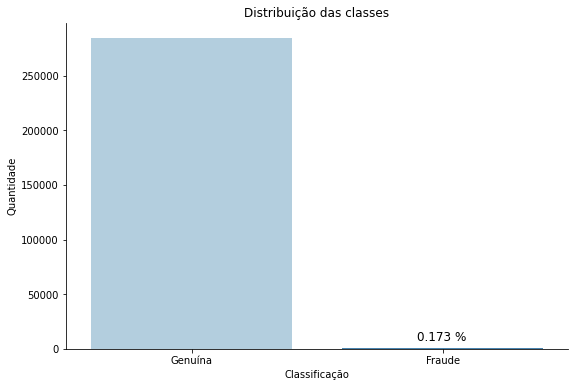

In [24]:
print(y.value_counts())
fig, ax = plt.subplots(figsize= (9,6), dpi= 72)
sns.countplot('Class', data= y, palette= 'Blues', ax= ax)
ax.set_title('Distribui√ß√£o das classes')
plt.annotate(str(pct_class)+" %", xy=(0.9 , 15000), xytext=(0.9, 8000), size=12)
plt.ylabel("Quantidade")
plt.xlabel("Classifica√ß√£o")
plt.xticks([0,1], ['Genu√≠na', 'Fraude'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

A vari√°vel *target* possui apenas 0,17% de representa√ß√£o em todo nosso dataSet. Esse percentual de `transa√ß√µes fraudulentas` √© bem menor que o de `transa√ß√µes genu√≠nas`. Quando alguma categoria √© muito rara, menor que 5%, √© recomendado realizar o balanceamento de classes. Nesse caso ser√° necess√°rio.

##### 3.1.3.4 Rela√ß√µes Var_target

###### a) Vari√°vel `Time`

Representa o n√∫mero de segundos decorridos entre esta transa√ß√£o e a primeira transa√ß√£o no conjunto de dados

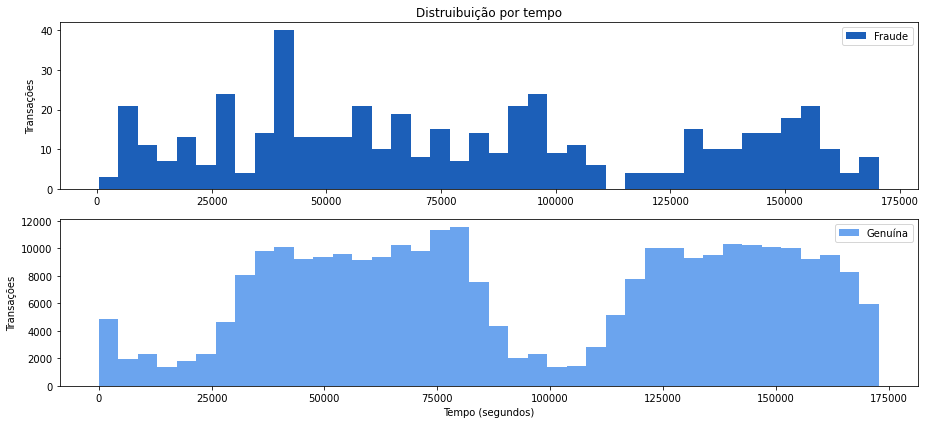

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols= 1, figsize= (13,6))

dados.Time.loc[dados.Class == 1].plot(kind= 'hist', ax= ax1, label= 'Fraude', color= '#1C5FB8', bins= 40)
ax1.legend()
ax1.set_ylabel('Transa√ß√µes')
dados.Time.loc[dados.Class == 0].plot(kind= 'hist', ax= ax2, label= 'Genu√≠na', color= '#6BA4EE', bins= 40)
ax2.legend()
ax1.set_title('Distruibui√ß√£o por tempo')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transa√ß√µes')
plt.tight_layout()

Ao longo da dimens√£o `Time`, atributo que indica o tempo em segundos da 1¬™ transa√ß√£o monitorada at√© o momento do acontecimento, entretanto n√£o conseguimos inferir nenhuma informa√ß√£o a partir da distribui√ß√£o do tempo e tipo de transa√ß√£o.

###### b) Vari√°vel `Amount`
Nos informa os valores das transa√ß√µes, separando pela descri√ß√£o do tipo da transa√ß√£o, temos:

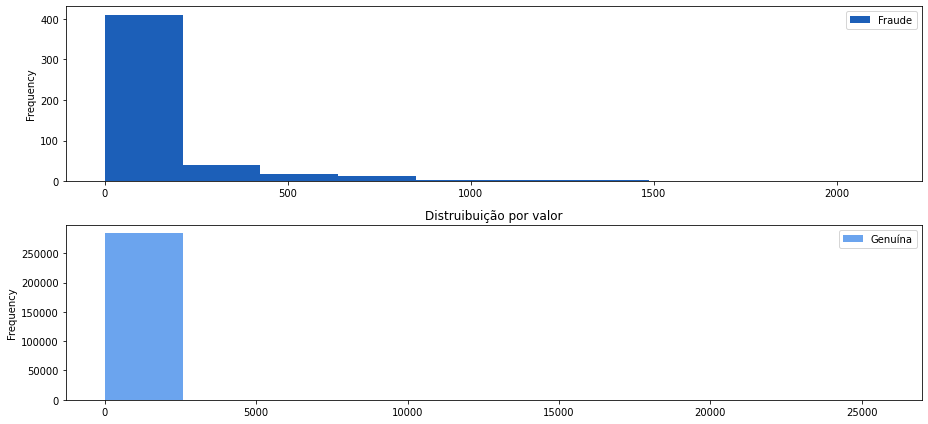

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols= 1, figsize= (13,6))

dados.Amount.loc[dados.Class == 1].plot(kind= 'hist', ax= ax1, label= 'Fraude', color= '#1C5FB8')
ax1.legend()
dados.Amount.loc[dados.Class == 0].plot(kind= 'hist', ax= ax2, label= 'Genu√≠na', color= '#6BA4EE')
ax2.legend()
plt.title('Distruibui√ß√£o por valor')
plt.tight_layout()

Quando **genu√≠na**:

In [27]:
dados.Amount.loc[dados.Class==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Observamos que 75% dos dados est√£o entre o valor de 0,00 √† 77,05. Analisando os restantes 25% dos dados genu√≠nos.

In [28]:
seletor = (dados.Class==0) & (dados.Amount > 77.05)
dados['Amount'][seletor].describe()

count    71062.000000
mean       294.640875
std        438.512600
min         77.060000
25%        108.240000
50%        165.000000
75%        303.800000
max      25691.160000
Name: Amount, dtype: float64

Podemos verificar que cerca de 93% dos valores das transa√ß√µes genu√≠nas et√£o abaixo do valor de 303,80.

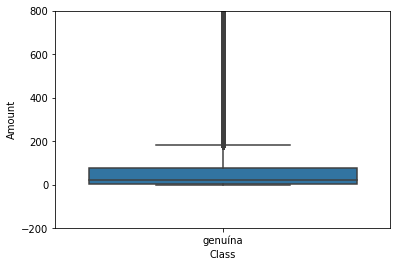

In [29]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados.loc[dados.Class==0])
plt.ylim((-200,800))
plt.xticks([0],['genu√≠na']);

Quando **fraudulenta**:

In [30]:
dados.Amount.loc[dados.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

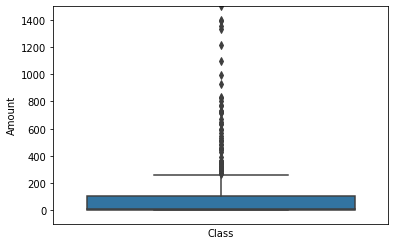

In [31]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados.loc[dados.Class==1])
plt.ylim((-100,1500))
plt.xticks([1], ['fraude']);

Existe diferen√ßas no padr√£o transa√ß√µes em rela√ß√£o ao atributo `Amount`.Tal distribui√ß√£o diferente para as duas classes provavelmente ir√° contribuir para o treinamento do modelo de machine learning.

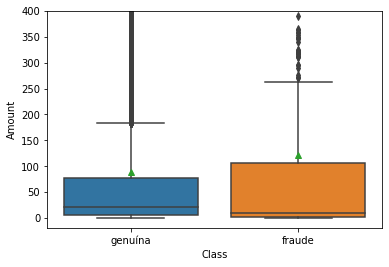

In [32]:
sns.boxplot(x= 'Class', y= 'Amount', data= dados, showmeans= True)
plt.ylim((-20,400))
plt.xticks([0,1], ['genu√≠na', 'fraude']);

#####  3.1.3.5  Distribui√ß√£o Dados

Distribui√ß√£o geral dos dados, temos:

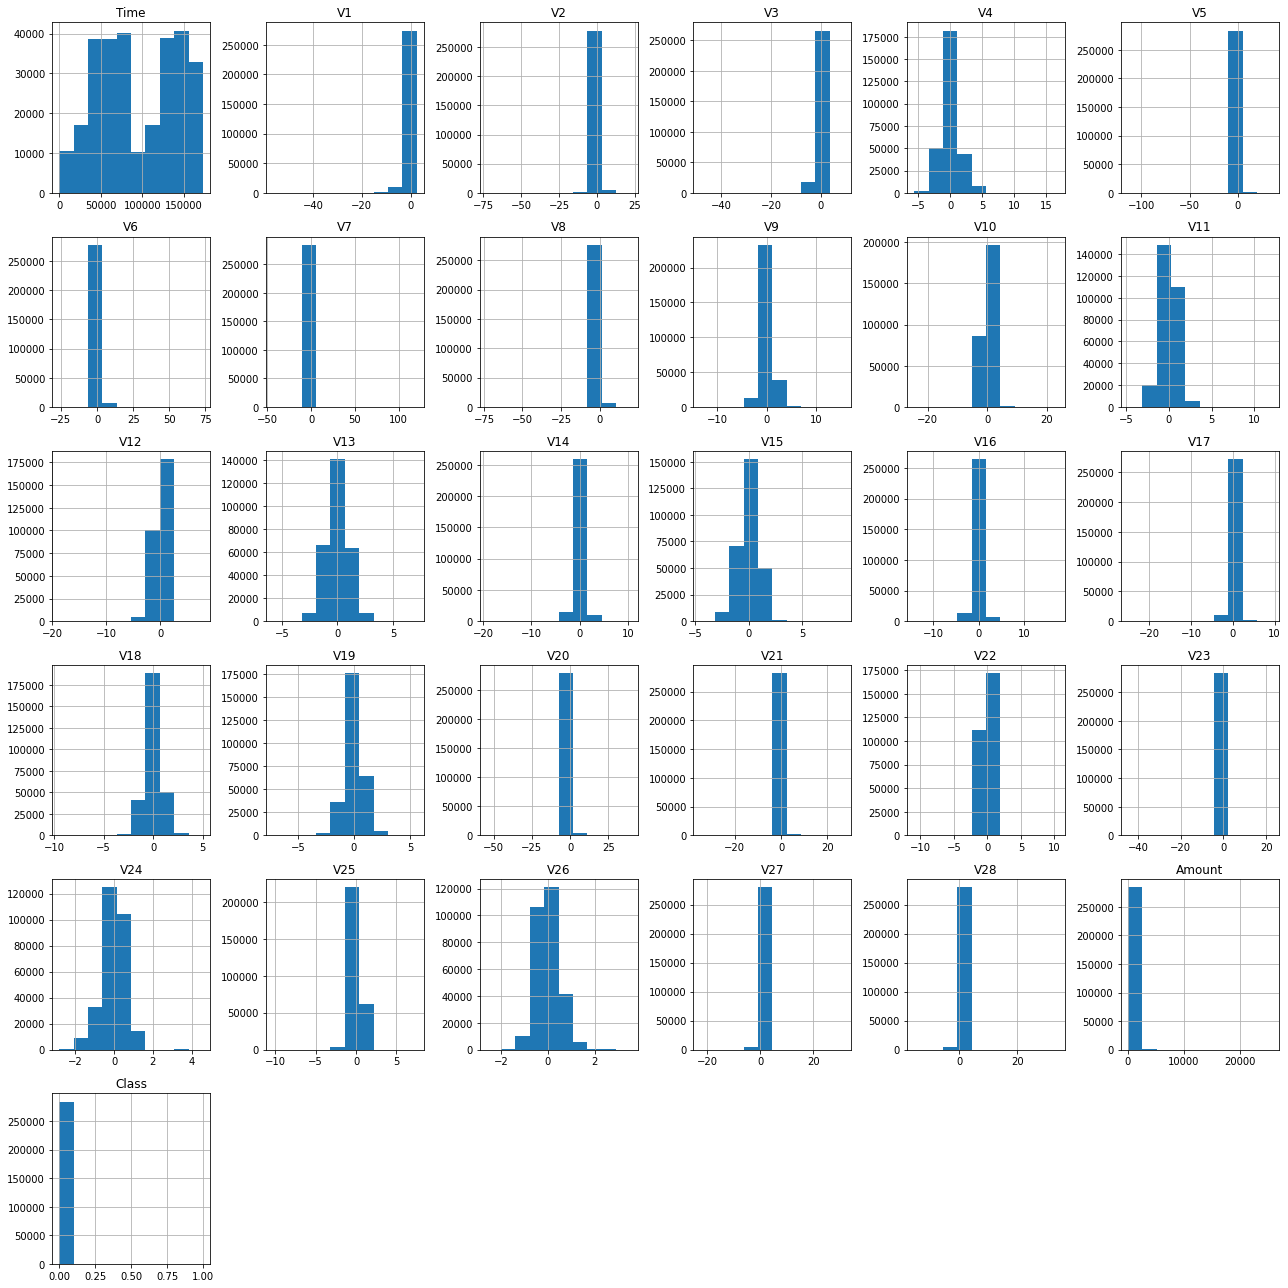

In [33]:
plt.rcParams['figure.figsize']= (18,18)
dados.hist()
plt.tight_layout()

Um gr√°fico de densidade √© muito √∫til para verificar como se comporta as distribui√ß√µes de cada vari√°vel, segregada por classe, afim de detectar poss√≠veis anomalias, bem como qual atributo possuem distribui√ß√µes que diferem uma da outra, permitindo identificar as **classes positivas** (fraudes, nesse caso) mais facilmente.

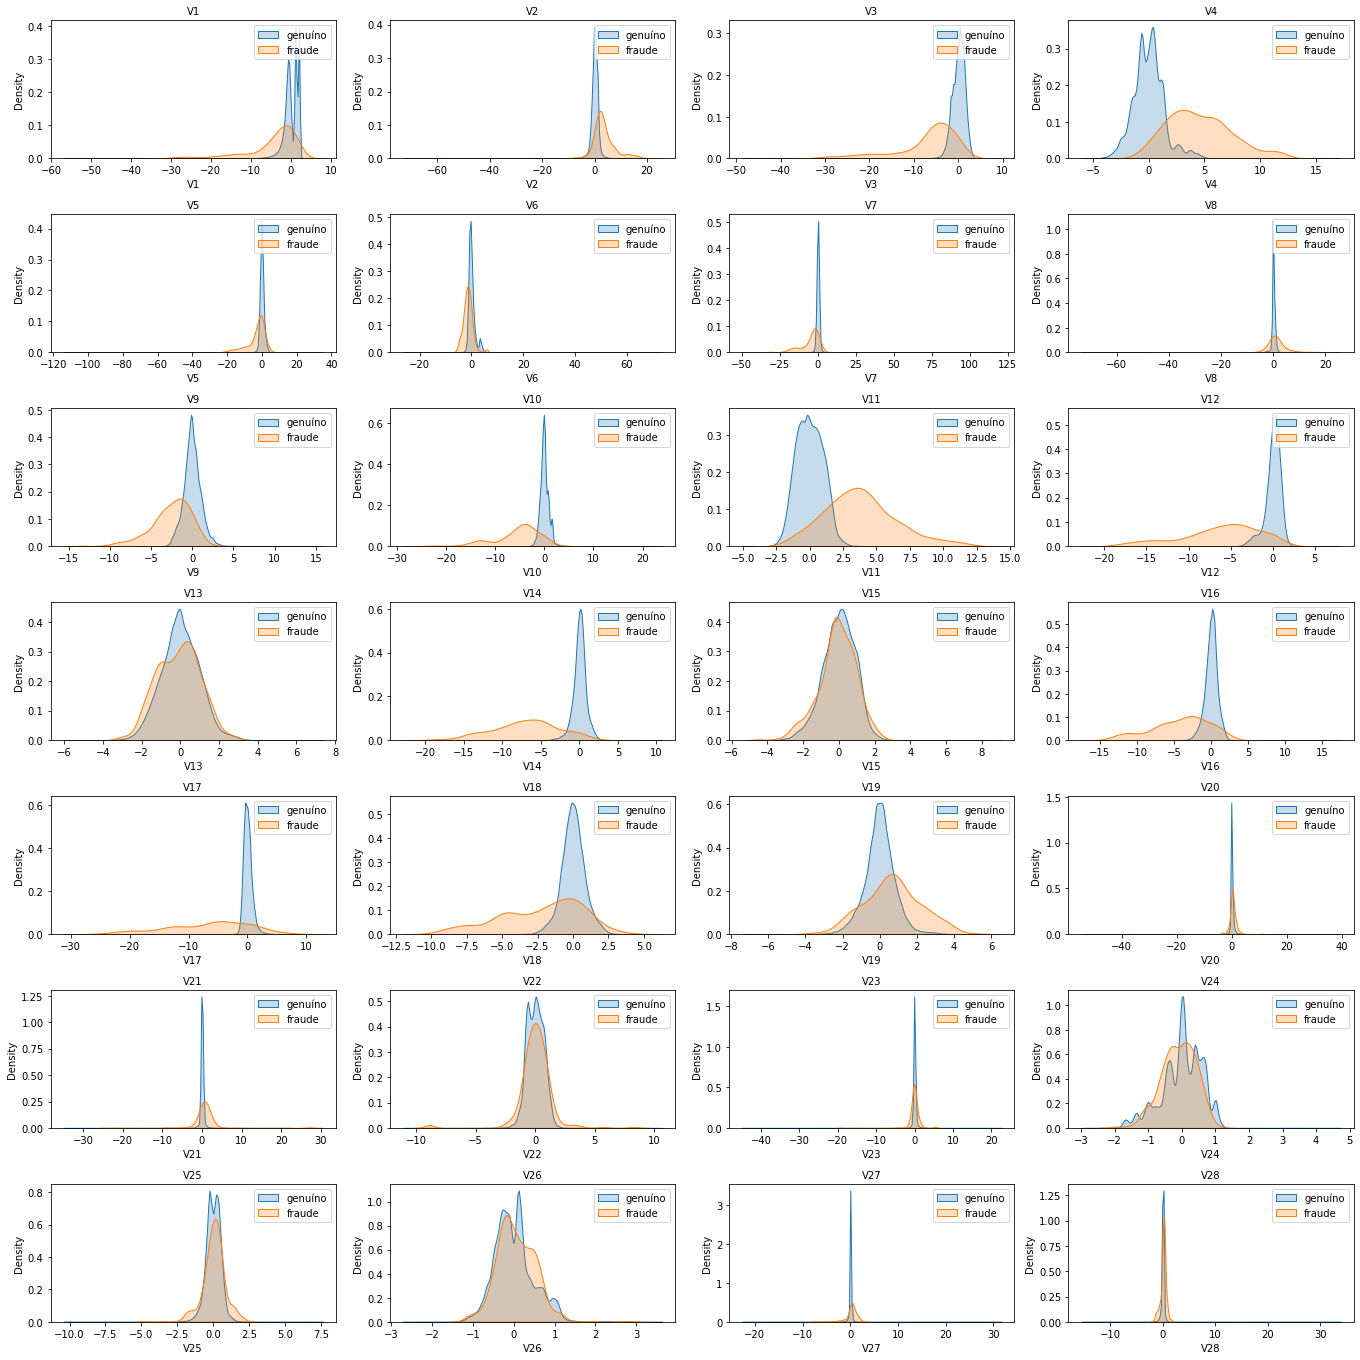

In [34]:
from IPython.core.pylabtools import figsize
# indicando quais colunas ser√£o plotados e quantos plots teremos
colunas_grf = dados.drop(['Time', 'Amount', 'Class'], axis=1).columns
qtd_plots = len(colunas_grf)

# separar dados em fraude e genu√≠no
dados_genuino = dados[dados.Class == 0]
dados_fraude = dados[dados.Class == 1]

# espa√ßo do plot
fig, ax = plt.subplots(nrows= 7, ncols= 4, figsize= (19,19))
fig.subplots_adjust(hspace=1, wspace=1)

# plot
index= 0
for coluna in colunas_grf:
  index += 1
  plt.subplot(7,4, index)
  sns.kdeplot(dados_genuino[coluna], label= 'genu√≠no', shade= True)
  sns.kdeplot(dados_fraude[coluna], label= 'fraude', shade= True)
  plt.title(coluna, fontsize= 10)
  plt.legend()
plt.tight_layout()

Com isso podemos inferir que os atributos `V3`, `V4`, `V11` e `V12` podem ter poss√≠vel poder preditivo em separar uma transa√ß√£o fraudulenta de uma genu√≠na.

####  3.1.4  An√°lise da Var_Explanat√≥ria

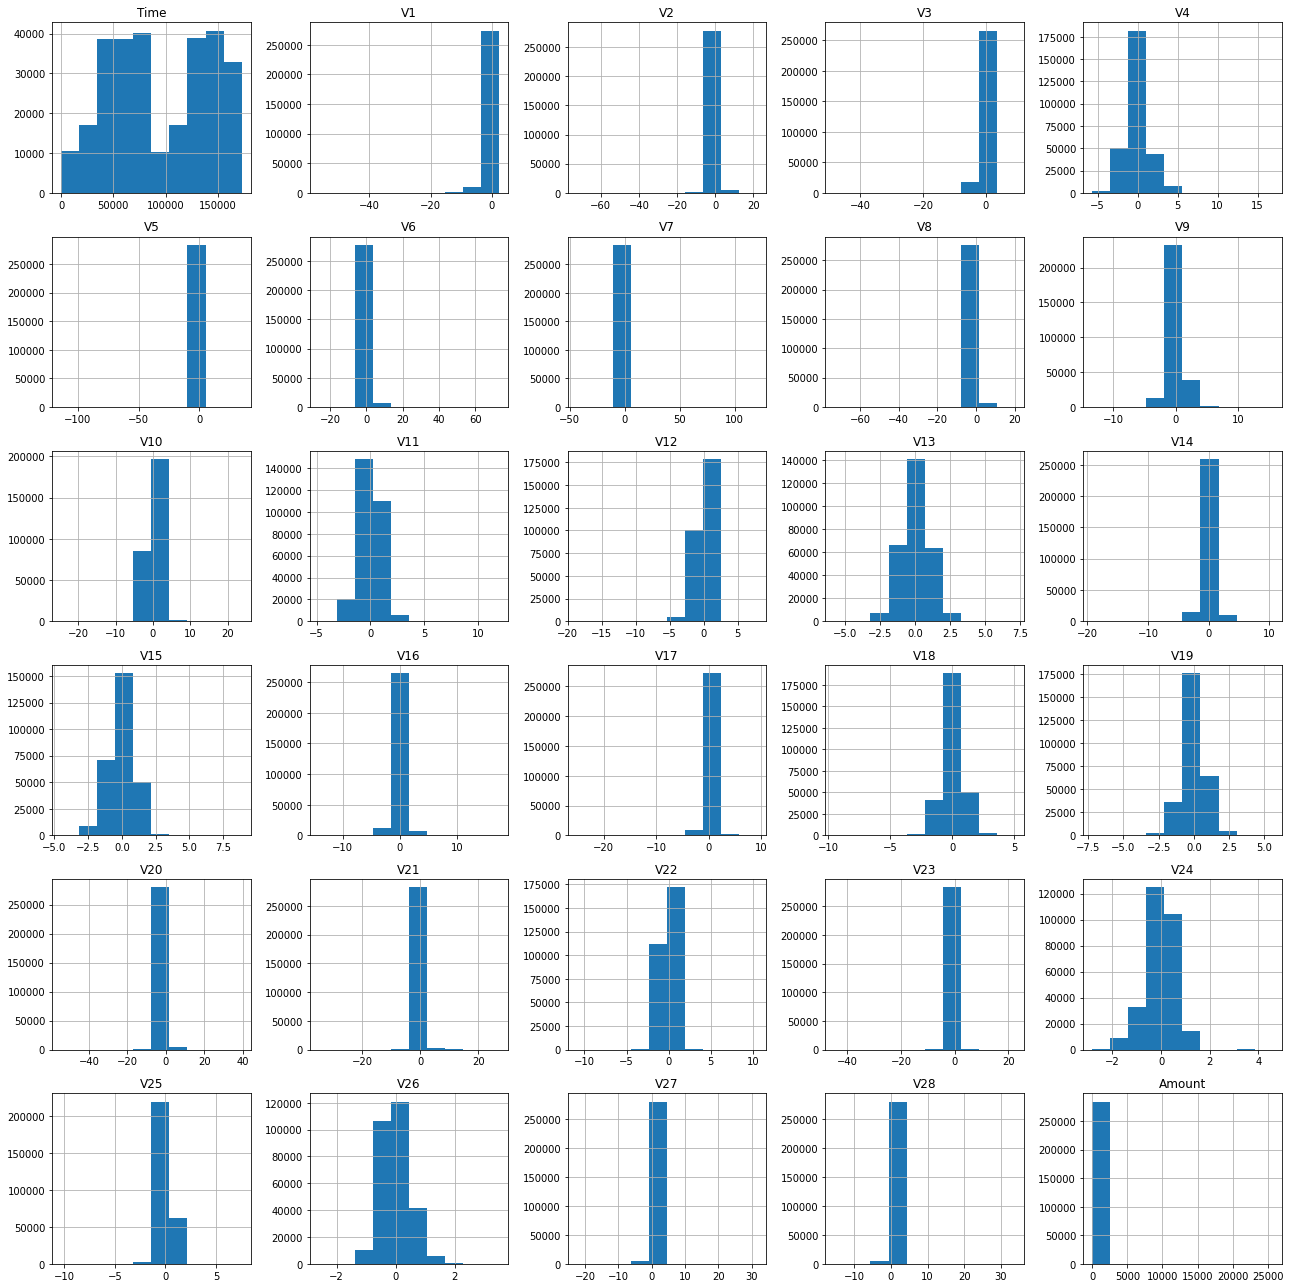

In [35]:
plt.rcParams['figure.figsize']= (18,18)
X.hist()
plt.tight_layout()

Vizualizando as vari√°veis explanat√≥rias, observamos que os atributos `Time` e  `Amount`, n√£o tiveram as mesmas transforma√ß√µes que as demais. Isso se d√° pelo fato de que as demais vari√°veis explanat√≥rias `V1` a `V28` s√£o resultados de componentes principais, transformadas pela t√©cnica conhecida como PCA (Principal Component Analysis), como j√° discorrido no in√≠cio do notebook, de certa forma (i) tornou os dados anonimizados e (ii) colocou-os em um formato padronizados.

###### 3.1.4.2.1 Correla√ß√£o Atributos

Abaixo apresentamos uma matrix de correla√ß√£o com o dataSet sem nenhum pr√©-processamento. A prop√≥sito, a matriz de correla√ß√£o buscar identificar a for√ßa na rela√ß√£o entre dois atributos.

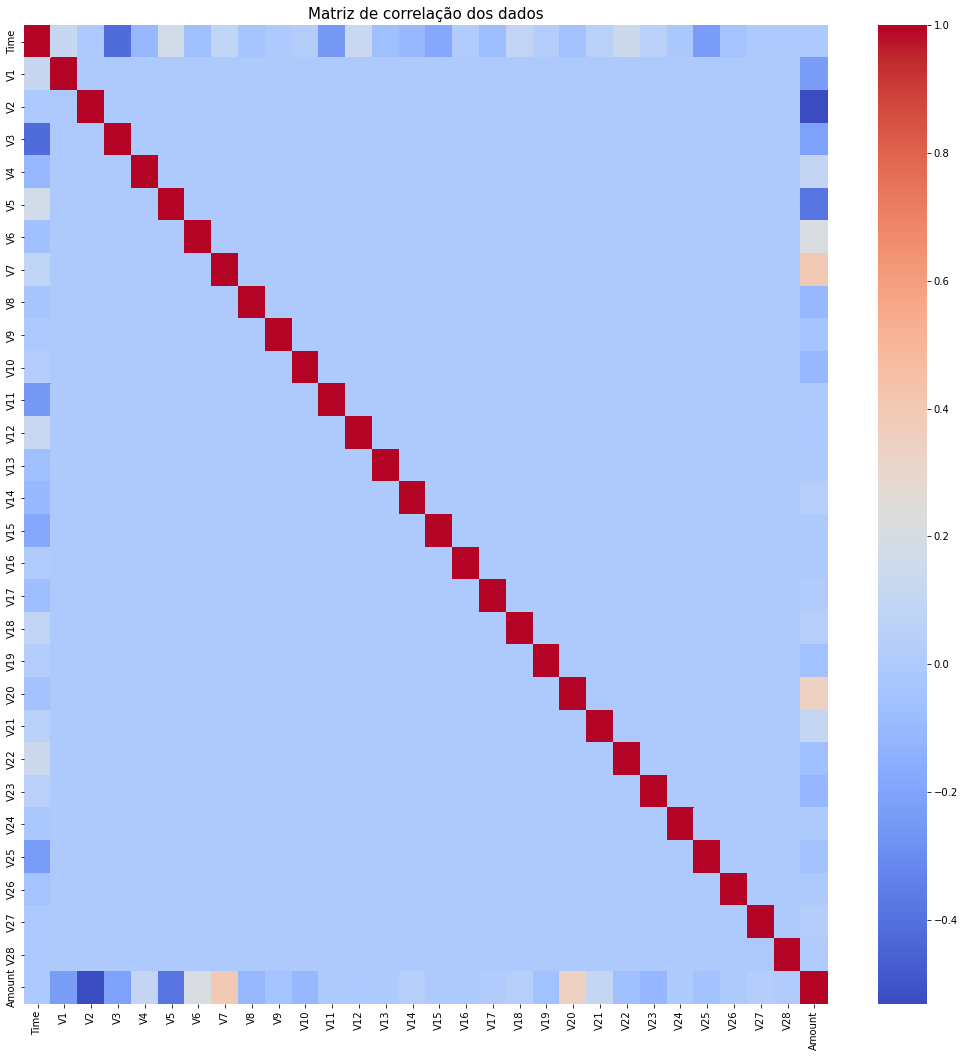

In [36]:
sns.heatmap(X.corr(),annot = False, cmap="coolwarm")
plt.title("Matriz de correla√ß√£o dos dados",fontsize= 15)
plt.show()

Nesta fase de an√°lise explorat√≥ria dos dados podemos verificar que:


1.   A classe positiva (n√£o relacione o sentido da palavra "positivo" com o objetivo do projeto, que √© dectar fraude) encontra-se com baix√≠ssima ocorr√™ncia no dataSet, mostrando um poss√≠vel desbalanceamento dos dados. A classe fraudulenta representa 0,17% do total de entradas.
1.   Os dados n√£o possuem dados *Missing's*. (Cabe ressaltar que os dados j√° estavam bem estruturados, na maioria dos casos encontamos dados nulos que devem ser tratados na fas√© de pr√©-processamento)
2.   Os atributos, ao serem anonimizados pela t√©cnica de PCA, assume-se a premissa que foram padronizadas.
2.   Ao passo que, as colunas `Time` e `Amount` n√£o est√£o padronizados, como as demais *features*


## **4. Pr√©-Processamento dados**
Muitos algoritmos esperam receber os dados em um formato espec√≠fico. √â seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que voc√™ est√° utilizando.
√â muito prov√°vel que voc√™ tenha que realizar tarefas de **pr√©-processamento** nos dados. Esse √© um passo extremamente necess√°rio dentro do processo.

O desafio √© o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transforma√ß√µes diferentes nos dados. Mas √© poss√≠vel em alguns casos, obter bons resultados sem um trabalho de pr√©-processamento. Mas, √© uma boa pr√°tica criar diferentes vis√µes e transforma√ß√µes dos dados, de modo a poder testar diferentes algoritmos de Machine Learning. ***Testar √© o lado divertido de Ci√™ncia de dados!!***

### 4.1 Feature Scaling

#### 4.1.1 Padroniza√ß√£o
t√©cnicas: from sklearn.preprocessing import
* (i) StandardScaler

√ötil para algor√≠timos que  pressup√µem  uma  distribui√ß√£o  gaussiana  nas vari√°veis de entrada e funcionam melhor com dados reescalonados, como regress√£o linear, regress√£o log√≠stica e an√°lise discriminante linear. Padroniza√ß√£o √© a t√©cnica para transformar os atributos com distribui√ß√£o Gaussiana (normal) e diferentes m√©dias e desvios padr√£o em uma distribui√ß√£o Gaussiana com a m√©dia igual a 0 e desvio padr√£o igual a 1.

`Time` e `Amount`

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* ser√° usada a padroniza√ß√£o por meio da classe `StandardScaler`.

In [37]:
# a. c√≥pia do dataSet
dados_pdr = dados.copy()

# a.1 reservando para novas previs√µes (15%)
dados_new = dados_pdr.sample(frac= 0.15, random_state= 0)

# a.2 obtendo os 85% restantes dos dados para o modelo
dados_pdr = dados_pdr.drop(dados_new.index)

# b. instancia um objeto do tipo StandardScaler
scaler = StandardScaler()

# c. aplicando a transforma√ß√£o nos dados
dados_pdr['Time_std'] = scaler.fit_transform(dados_pdr['Time'].values.reshape(-1,1))
dados_pdr['Amount_std'] = scaler.fit_transform(dados_pdr['Amount'].values.reshape(-1,1))

# d. deletar as colunas "despadronizadas"
dados_pdr.drop(['Time', 'Amount'], axis=1, inplace= True)
dados_pdr.head()

V1        V2        V3  ...  Class  Time_std  Amount_std
0 -1.359807 -0.072781  2.536347  ...      0 -1.997399    0.246341
1  1.191857  0.266151  0.166480  ...      0 -1.997399   -0.346945
2 -1.358354 -1.340163  1.773209  ...      0 -1.997378    1.171178
3 -0.966272 -0.185226  1.792993  ...      0 -1.997378    0.140872
4 -1.158233  0.877737  1.548718  ...      0 -1.997357   -0.075195

[5 rows x 31 columns]

A informa√ß√£o √© a mesma apenas em escala diferente!!!

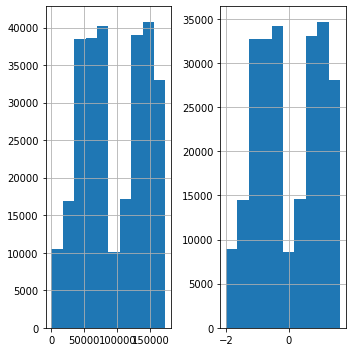

In [38]:
plt.rcParams['figure.figsize']= (5,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1)

dados.Time.hist(ax= ax1)
dados_pdr.Time_std.hist(ax= ax2)
plt.tight_layout()

### 4.2 Split dados
Dividir os dados em `Treino` e `Teste`   √© uma boa pr√°tica para garantir um modelo mais **generalista** poss√≠vel.

t√©cnicas: sklearn.model_selection import
* (i) train_test_split-est√°tico
* (ii) Cross-validation-rand√¥mico

#### 4.2.1 Est√°tico

O split de dados √© uma boa pr√°tica. Para realizar h√° necessidade de realizar a a segrega√ß√£o da `vari√°vel Target` do dataSet. J√° realizamos esse procedimento anteriormente (item 3.1.2) deste Colab. Como realizamos atividades de *Feature scaling*, usaremos o dataSet padronizada para obter o `X`, vari√°veis preditoras e o `y`  vari√°vel a ser predita, al√©m de ser como os algortimos de ML do Sckit esperam receber os dados!!!

In [39]:
X = dados_pdr.drop(columns= 'Class', axis= 1)
y = dados_pdr['Class']


O par√¢metro `stratify=True`, garante que os conjuntos de Treino e Teste tenham a mesma quantidade de classes proporcionalmente e o par√¢metro `shuffle=T`, embaralha o dataSet, indicando aleatoriedade.

In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, shuffle=True)

In [41]:
print('tamanho total dos dados s√£o {}, para treino temos {} e teste s√£o {}'.format(dados_pdr.shape[0], len(X_treino), len(X_teste)))

tamanho total dos dados s√£o 242086, para treino temos 181564 e teste s√£o 60522


Importante destacar que mesmo splitando os dados, devemos manter a propocionalidades entre as classes. No in√≠cio do jupyter (3.1.3.2) verificamos que a classe fraudulenta representa cerca de 0.1727% do dataSet. Ap√≥s a divis√£o dos dados √© importante verificar essa rela√ß√£o. Abaixo √© mostrado como ficou o balanceamento nos dados de treino e teste.

In [42]:
bal_treino = ((y_treino.value_counts() / len(y_treino))*100)[1]
bal_teste = ((y_teste.value_counts() / len(y_teste))*100)[1]
print('percentual de classes fraudulenta nos dados de teste:{} % e dados de treino:{} %'.format(bal_teste, bal_treino))

percentual de classes fraudulenta nos dados de teste:0.17349063150589866 % e dados de treino:0.1723910026216651 %


Mantidas as proporsionalidaes originais, seguiremos para o balanceamento das classes.

### 4.3 Feature Engineer
#### 4.3.1 Balanceamento de classes 
Balanceamento dos dados: s√£o t√©cnicas para manter um "certo balancemanto" entre as classes, pois se temos classe majorit√°ria o modelo de ML, possivelmente aprender√° mais sobre ela, logo temos um problema -> modelo sem generaliza√ß√£o, devemos evitar.
Podemos utilizar:
* **oversampling** : cria-se de forma rand√¥mica, dados sint√©ticos para classe minorit√°ria, com base em regras estat√≠sticas e de forma aleat√≥ria.
* **undersampling**: remove-se alguns registros da classe majorit√°ria, preservando as caracter√≠sticas da classe minorit√°ria, ideal para quando se h√° um grande volume de dados. Este m√©todo pode acarretar em um desempenho inferior na hora de fazer predi√ß√µes da classe majorit√°ria, pois reduz o tamanho do dataset.
* [**ADASYN**](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn): cria novas amostras (over-sampling), pr√≥ximas √†s originais que s√£o classificadas de forma errada usando um classificador K-Nearest Neighbors.
* [**SMOTE**](https://arxiv.org/abs/1106.1813): Synthetic Minority Over-sampling Technique, m√©todo de amostragem excessiva da classe minorit√°ria envolve a cria√ß√£o de exemplos (over-sampling) sint√©ticos de classes minorit√°rias

**ATEN√á√ÉO 1**: o ideal √© sempre aplicar as t√©cnicas depois de realizar o split dos dados (treino e teste). Se aplicar o balancemento antes, o padr√£o usado para aplicar o oversampling/undersampling ser√° o mesmo nos dados de treino e de teste, com isso a avalia√ß√£o do modelo fica comprometida.

**ATEN√á√ÉO 2**: voc√™ ao tomar decis√£o de balancear os dados, diretamente est√° alterando seu conjunto de dados. Ou seja, saiba ***o que*** est√° fazendo e ***para que*** est√° fazendo!!!!


Da biblioteca `imblearn` √© poss√≠vel aplicar t√©cnicas de balanceamento de dados. Usaremos al√©m do *Undersampling* que remove amostras da classe majorit√°rio, preservando assim a classe minorit√°ria. Mais 2 t√©cnicas de over-sampling para fins de comparara√ß√£o qual mais se adequa aos dados e o prop√≥sito do projeto, bem como o uso dos dados desbalanceados.
* m√©todo 1 : undersampling
* m√©todo 2 : SMOTE
* m√©todo 3 : ADASYN

In [43]:
# a. instanciar as classes dos m√©todos pretendidos
rus = RandomUnderSampler()
smt = SMOTE()
ada = ADASYN()

# b. usam m√©todo fit_sample() para usar a t√©cnica
X_treino_rus, y_treino_rus = rus.fit_resample(X_treino, y_treino)
X_treino_smt, y_treino_smt = smt.fit_resample(X_treino, y_treino)
X_treino_ada, y_treino_ada = ada.fit_resample(X_treino, y_treino)

Verificando o balanceamento

In [44]:
print("m√©todo 1:\n", y_treino_rus.value_counts(),"\n")
print("m√©todo 2:\n", y_treino_smt.value_counts(),"\n")
print("m√©todo 3:\n", y_treino_ada.value_counts())

m√©todo 1:
 1    313
0    313
Name: Class, dtype: int64 

m√©todo 2:
 1    181251
0    181251
Name: Class, dtype: int64 

m√©todo 3:
 0    181251
1    181237
Name: Class, dtype: int64


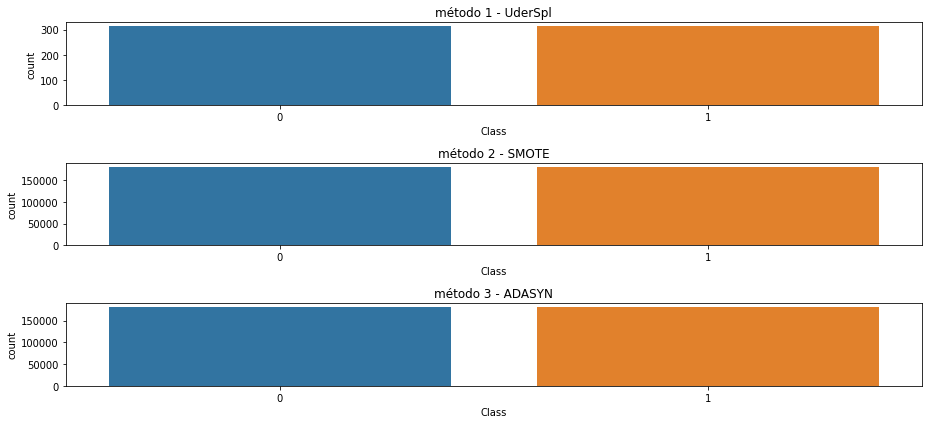

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 3, ncols= 1, figsize= (13,6))

sns.countplot(y_treino_rus, ax= ax1)
ax1.set_title('m√©todo 1 - UderSpl')
sns.countplot(y_treino_smt, ax= ax2)
ax2.set_title('m√©todo 2 - SMOTE')
sns.countplot(y_treino_ada, ax= ax3)
ax3.set_title('m√©todo 3 - ADASYN')
plt.tight_layout()

Didaticamente, vamos observar como se d√° a correla√ß√£o entre os atributos com os dados balanceados.

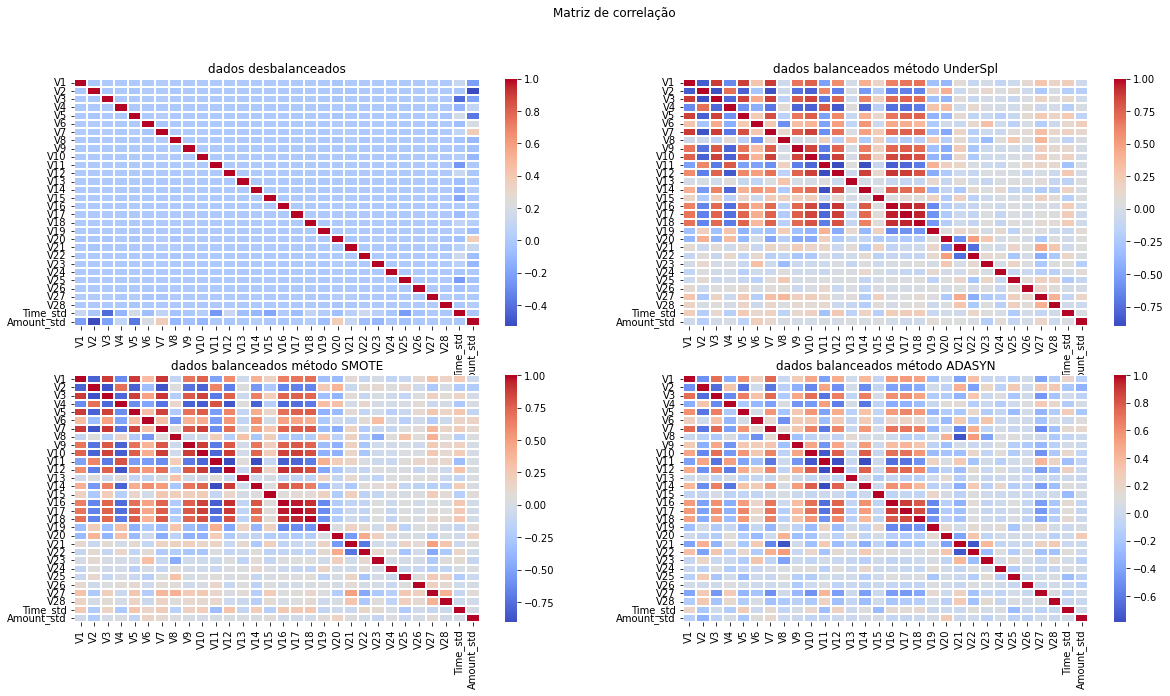

In [46]:
correlacao = X_treino.corr()
correlacao_rus = X_treino_rus.corr()
correlacao_smt = X_treino_smt.corr()
correlacao_ada = X_treino_ada.corr()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
fig.suptitle('Matriz de correla√ß√£o')

sns.heatmap(correlacao,
            xticklabels = correlacao.columns,
            yticklabels = correlacao.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[0][0])
ax[0][0].set_title('dados desbalanceados')

sns.heatmap(correlacao_rus,
            xticklabels = correlacao_rus.columns,
            yticklabels = correlacao_rus.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[0][1])
ax[0][1].set_title('dados balanceados m√©todo UnderSpl')

sns.heatmap(correlacao_smt,
            xticklabels = correlacao_smt.columns,
            yticklabels = correlacao_smt.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[1][0])
ax[1][0].set_title('dados balanceados m√©todo SMOTE')

sns.heatmap(correlacao_ada,
            xticklabels = correlacao_ada.columns,
            yticklabels = correlacao_ada.columns,
            linewidths = 1.,
            cmap = 'coolwarm',
            ax = ax[1][1])
ax[1][1].set_title('dados balanceados m√©todo ADASYN')

plt.show()

Ao balancear os dados, alguns atributos observa-se correla√ß√µes mais fortes!!!

= output: dados pr√©-processados e splitados para iniciar a constru√ß√£o do modelo de ML

## **5. Sele√ß√£o Algoritmo**
Dado o problema de neg√≥cio, a sele√ß√£o do algoritmo se d√° pelo modelo que apresentou melhor performance, sendo assim temos que treinar o algoritmo, testar e validar. Logo podemos utilizar (i) individualizar/automatizar modelos de algoritmos de ML ou (ii) usar algoritmos tipo ensemble.

Para este projeto usaremos 2 algoritmos de ML para problemas de classifica√ß√£o,
* (i.) [Regress√£o Log√≠stica](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148) √© um algoritmo de an√°lise preditiva e se baseia no conceito de probabilidade.
* (ii.) √Årvore de decis√£o, s√£o constru√≠das a partir de um processo de indu√ß√£o, onde os dados s√£o divididos em subconjuntos cada vez mais puro - ganho de informa√ß√£o e entropia.

Treinaremos esses 2 algor√≠tmos com os 4 dataSet que possu√≠mos sendo 1 com dados *desbalanceados* e 3 com t√©cnicas diferentes de balanceamento.


#### (i) individualizar/automatizar

### 5.1 (i) - individualizado (split est√°tico)

#### 5.1.1 criar modelo 

No modelo de √Årvores de Decis√£o, instanciamos ajustando alguns *hyperpar√¢emtros* do algor√≠tmo. N√£o trataremos, neste projeto, dos hyperpar√¢emtros, no entanto, √© atrav√©s destes hyperpar√¢metros que impactamos na constru√ß√£o de modelos de ML.


In [47]:
modelo_RL_1 = LogisticRegression()
modelo_RL_2 = LogisticRegression()
modelo_RL_3 = LogisticRegression()
modelo_RL_4 = LogisticRegression()

modelo_DT_1 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
modelo_DT_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy')


In [48]:
print(type(modelo_RL_1))
print(type(modelo_DT_1))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


Pronto!! Isso √© um modelo de Aprendizado de M√°quina!!! Um objeto istanciado com a classe do algortimo que busca responder nosso problema de neg√≥cio!!!

#### 5.1.2 treino modelo (.fit) 

Agora iremos treinar os modelos instanciados com dados tanto desbalanceados, quanto com os dados balanceados pelas 3 t√©cnicas citadas acima.


In [49]:
modelo_RL_1.fit(X_treino, y_treino)
modelo_RL_2.fit(X_treino_rus, y_treino_rus)
modelo_RL_3.fit(X_treino_smt, y_treino_smt)
modelo_RL_4.fit(X_treino_ada, y_treino_ada)

modelo_DT_1.fit(X_treino, y_treino)
modelo_DT_2.fit(X_treino_rus, y_treino_rus)
modelo_DT_3.fit(X_treino_smt, y_treino_smt)
modelo_DT_4.fit(X_treino_ada, y_treino_ada)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### 5.1.3 teste modelo (.predict)

Para estimar qu√£o bem o modelo ir√° performar diante de novos dados, objetivo principal de um modelo preditivo √© calcular atr√°ves da aplica√ß√£o do modelo aos **dados de teste**. Ou seja, √© entregue ao modelo dados de **teste**, informa√ß√µes que ele n√£o viu ainda, para verificar o qu√£o **generaliz√°vel** est√° o modelo.



In [50]:
y_pred_RL_1 = modelo_RL_1.predict(X_teste)
y_pred_RL_2 = modelo_RL_2.predict(X_teste)
y_pred_RL_3 = modelo_RL_3.predict(X_teste)
y_pred_RL_4 = modelo_RL_4.predict(X_teste)

y_pred_DT_1 = modelo_DT_1.predict(X_teste)
y_pred_DT_2 = modelo_DT_2.predict(X_teste)
y_pred_DT_3 = modelo_DT_3.predict(X_teste)
y_pred_DT_4 = modelo_DT_4.predict(X_teste)


Em problemas de classifica√ß√£o as previs√µes se referem √† probabiblidade da observa√ß√£o pertencer √† classe positiva, que no caso √© **transa√ß√£o fraudulenta**. Usando um recurso do Sckit encontramos a probabilidade de pertencimento para cada classe poss√≠vel, usando um m√©todo do algoritmo de Regress√£o log√≠stica: `predict_proba(x)`. 



In [51]:
y_pred_RL_1_prob = modelo_RL_1.predict_proba(X_teste)
y_pred_RL_2_prob = modelo_RL_2.predict_proba(X_teste)
y_pred_RL_3_prob = modelo_RL_3.predict_proba(X_teste)
y_pred_RL_4_prob = modelo_RL_4.predict_proba(X_teste)

y_pred_DT_1_prob = modelo_DT_1.predict_proba(X_teste)
y_pred_DT_2_prob = modelo_DT_2.predict_proba(X_teste)
y_pred_DT_3_prob = modelo_DT_3.predict_proba(X_teste)
y_pred_DT_4_prob = modelo_DT_4.predict_proba(X_teste)

In [52]:
print(y_pred_RL_1[489])
print(y_pred_RL_1_prob[489])


0
[9.99823820e-01 1.76180054e-04]


Ou seja, com esse m√©todo podemos verificar que para o primeiro registro dos dados de teste, o modelo preveu que seria 0 (transa√ß√£o genu√≠na) pois a classe 0 teve 99,98% de chance de ocorrer.

#### 5.1.4 performance modelo (.score)
Os dados de **teste** s√£o usados nesta fase para verificar o qu√£o bem est√° o modelo. Modelo foi treinado com os dados de **treino**, fizemos previs√µes com os dados de teste, agora iremos comparar a previs√µes como o que realmente deveria ser previsto,

Usaremos duas m√©tricas, dentre v√°rias que podemos usar para problemas de classifica√ß√£o, a saber:
* Acur√°cia: medida de performance intuitiva, mede a acur√°cia geral do modelo, √© o quociente das previs√µes corretas pelao total das previs√µes.
* [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772): √© uma das melhores m√©tricas para avalia√ß√£o seu modelo, uma vez que quando as previs√µes est√£o 100% erradas seu valor √© zero e quando est√£o 100% certas seu valor √© 1. Cada modelo vai apresentar um valor de AUC, isso nos auxilia a determinar o melhor modelo.

In [53]:
print("---------------- Curva AUC Regress√£o Logistica -----------------")
print('AUC_RL_1: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_1)))
print('AUC_RL_2: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_2)))
print('AUC_RL_3: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_3)))
print('AUC_RL_4: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_RL_4)))

print("---------------- Curva AUC Decision Tree -----------------")
print('AUC_DT_1: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_1)))
print('AUC_DT_2: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_2)))
print('AUC_DT_3: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_3)))
print('AUC_DT_4: {:.4f}\n'.format(roc_auc_score(y_teste, y_pred_DT_4)))
print("---------------- Acur√°cia Regress√£o Log√≠stica ---------------------")
print('Acuracia_RL_1: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_1)))
print('Acuracia_RL_2: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_2)))
print('Acuracia_RL_3: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_3)))
print('Acuracia_RL_4: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_RL_4)))

print("---------------- Acur√°cia Decision Tree ---------------------")
print('Acuracia_DT_1: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_1)))
print('Acuracia_DT_2: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_2)))
print('Acuracia_DT_3: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_3)))
print('Acuracia_DT_4: {:.4f}\n'.format(accuracy_score(y_teste, y_pred_DT_4)))

---------------- Curva AUC Regress√£o Logistica -----------------
AUC_RL_1: 0.8237

AUC_RL_2: 0.9304

AUC_RL_3: 0.9446

AUC_RL_4: 0.9223

---------------- Curva AUC Decision Tree -----------------
AUC_DT_1: 0.8856

AUC_DT_2: 0.9174

AUC_DT_3: 0.9213

AUC_DT_4: 0.8934

---------------- Acur√°cia Regress√£o Log√≠stica ---------------------
Acuracia_RL_1: 0.9992

Acuracia_RL_2: 0.9750

Acuracia_RL_3: 0.9748

Acuracia_RL_4: 0.9019

---------------- Acur√°cia Decision Tree ---------------------
Acuracia_DT_1: 0.9994

Acuracia_DT_2: 0.9680

Acuracia_DT_3: 0.9852

Acuracia_DT_4: 0.8536



Escolheremos como m√©trica a AUC, dado a amplitude da m√©trica. Com os dados utilzados verificaremos a matriz de confus√£o do modelo de RL com balanceamento de Under-sampling e o modelo de √°rvore de decis√£o com os dados balanceados com a mesma t√©cnica.

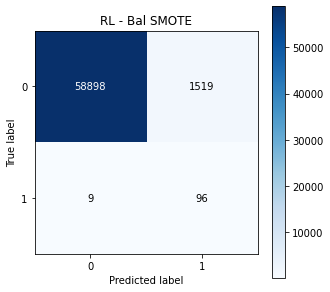

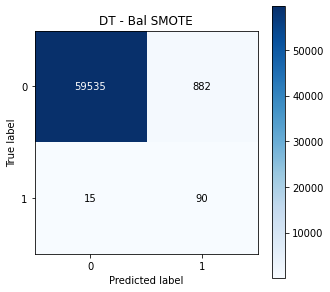

In [72]:
skplt.metrics.plot_confusion_matrix(y_teste, y_pred_RL_3, normalize = False)
plt.title('RL - Bal SMOTE')
skplt.metrics.plot_confusion_matrix(y_teste, y_pred_DT_3, normalize = False)
plt.title('DT - Bal SMOTE')
plt.show()

A *confusion matrix* permite identificar quais dos 2 tipos de erros o modelo incorreu.

Erros do **tipo 1** s√£o os conhecidos como **falso Positivo (FP)**, para nosso caso esse erro √© quando o modelo preveu que seria uma fraude ao passo que era uma transa√ß√£o genu√≠na, ou seja, sabe quando voc√™ encontra uma oferta rel√¢mpago na Amazon.com e vai comprar teu cart√£o nega...ent√£o... √© isso... voc√™ poder√° ter sido um Falso Positivo, ou ainda.. quando est√° comprando uma passagem a√©rea pela com aquele precinho na *Itapemirim Airlines*..... opa, nesse caso foi vantagem ser um Falso Positivo üòÑüòÑüòÑ. 

Erros do **tipo 2** s√£o os **falso Negativo (FN)**, ou seja, foi previsto que a transa√ß√£o seria genu√≠na, no entanto era fraude. Para nosso problema de neg√≥cio, haveria um preju√≠zo financeiro para o cliente ou a instiui√ß√£o do cart√£o.

In [71]:
print('Matriz de Confus√£o: \n', '[VN, FP]', '\n', '[FN, VP]')
print(confusion_matrix(y_teste, y_pred_DT_2))

Matriz de Confus√£o: 
 [VN, FP] 
 [FN, VP]
[[58497  1920]
 [   14    91]]




1.   Algoritmos de √Årvores Decis√£o obtiveram um desempenho melhor ao lidar com os dados desbalanceados.
2.   Algoritmos de Regress√£o Logistica foram superiores ao lidar com dados balanceados. Sendo a t√©cnica SMOTE que obteve melhores resultados.
1.   A solu√ß√£o ideal √© aquela que melhor atende a institui√ß√£o, podendo ser a com o maior AUC, ou a com o maior n√∫mero de detec√ß√£o de fraudes, ou a menor taxa de FP (falso positivo).
2.   O modelo que melhor conseguiu prever fraudes foi o Modelo de Regress√£o Log√≠stica que treinou com dados balanceados pelo m√©todo SMOTE.

Ent√£o quer dizer que para todo modelo de classifica√ß√£o podemos usar a Regress√£o logistica e a t√©cnica de balanceamento SMOTE?

N√£o... üò∂üò∂üò∂ vai depender do problema de neg√≥cio que quer responder... a qualidade de seus dados... o tempo de treinamento... o volume representativo de dados.. capacidade computacional..... üòÑ Por isso que *Data Science* √© apaixonante!! desafios √∫nicos a cada projeto!

## **6. Prevendo com dados novos**


In [73]:
dados_new

Time         V1         V2  ...       V28  Amount  Class
183484  125821.0  -0.323334   1.057455  ...  0.161139   40.00      0
255448  157235.0  -0.349718   0.932619  ...  0.175562    1.98      0
244749  152471.0  -1.614711  -2.406570  ...  0.437322   96.00      0
63919    50927.0  -2.477184   0.860613  ... -0.660533  308.00      0
11475    19899.0   1.338831  -0.547264  ...  0.003272    5.00      0
...          ...        ...        ...  ...       ...     ...    ...
229333  145885.0  -0.330429   0.587057  ...  0.173363    1.29      0
189242  128317.0 -17.015895 -18.501723  ... -4.075417    6.37      0
232656  147253.0   0.044490   0.898231  ...  0.098383    2.69      0
174418  121905.0   1.945191  -0.273317  ... -0.033819   23.99      0
98354    66627.0  -0.982043   0.329463  ...  0.011244   22.92      0

[42721 rows x 31 columns]

In [74]:
dados_new['Time_std'] = scaler.fit_transform(dados_new['Time'].values.reshape(-1,1))
dados_new['Amount_std'] = scaler.fit_transform(dados_new['Amount'].values.reshape(-1,1))

# d. deletar as colunas "despadronizadas"
dados_new.drop(['Time', 'Amount'], axis=1, inplace= True)
dados_new.head()

V1        V2        V3  ...  Class  Time_std  Amount_std
183484 -0.323334  1.057455 -0.048341  ...      0  0.658372   -0.177738
255448 -0.349718  0.932619  0.142992  ...      0  1.320094   -0.321945
244749 -1.614711 -2.406570  0.326194  ...      0  1.219742    0.034666
63919  -2.477184  0.860613  1.441850  ...      0 -0.919236    0.838765
11475   1.338831 -0.547264  0.737389  ...      0 -1.572827   -0.310490

[5 rows x 31 columns]

In [75]:
X_new = dados_new.drop(columns= 'Class', axis= 1)
y_new = dados_new['Class']

In [76]:
y_pred_new = modelo_RL_3.predict(X_new)

In [78]:
print('AUC_RL_3: {:.4f}\n'.format(roc_auc_score(y_new, y_pred_new)))
print(confusion_matrix(y_new, y_pred_new))

AUC_RL_3: 0.9602

[[41556  1091]
 [    4    70]]


## **7. Bibliografia**


*   https://valor.globo.com/empresas/noticia/2021/11/09/black-friday-as-taticas-dos-criminosos-para-roubar-os-seus-dados.ghtml
*   https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html

*   https://cndl.org.br/politicaspublicas/mais-de-12-milhoes-de-consumidores-sofreram-alguma-fraude-financeira-nos-ultimos-12-meses-aponta-pesquisa-cndl-spc-brasil/#:~:text=maior%20de%20pessoas.-,De%20acordo%20com%20uma%20pesquisa%20da%20Confedera%C3%A7%C3%A3o%20Nacional%20de%20Dirigentes,12%2C1%20milh%C3%B5es%20de%20pessoas.


